In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# get data from temperature table
temp_df = pd.read_sql_table('temperature', 'sqlite:///../data/pipelineDB.sqlite')
temp_df.head(10)

,Area,Year,Change
0,Afghanistan,1961,0.023667
1,Afghanistan,1962,-0.282250
2,Afghanistan,1963,0.854000
3,Afghanistan,1964,-1.003250
4,Afghanistan,1965,0.011833
5,Afghanistan,1966,0.290083
6,Afghanistan,1967,-0.356083
7,Afghanistan,1968,-0.364917
8,Afghanistan,1969,-0.351417
9,Afghanistan,1970,0.663167


In [3]:
# get data from CO2 emissions table
CO2_df = pd.read_sql_table('CO2_emissions', 'sqlite:///../data/pipelineDB.sqlite')
CO2_df.head(10)

,Area,country_code,Year,co2_emissions
0,Africa Eastern and Southern,AFE,1990,304614.720181
1,Afghanistan,AFG,1990,2046.870000
2,Africa Western and Central,AFW,1990,97190.345000
3,Angola,AGO,1990,6564.200000
4,Albania,ALB,1990,6060.500000
5,Andorra,AND,1990,406.704000
6,Arab World,ARB,1990,632472.870000
7,United Arab Emirates,ARE,1990,55210.400000
8,Argentina,ARG,1990,100313.900000
9,Armenia,ARM,1990,19845.200000


In [6]:
# display merged table
merged_df = pd.read_sql_table('tempCO2', 'sqlite:///../data/pipelineDB.sqlite')
merged_df.head(10)

,Area,Year,Change,country_code,co2_emissions
0,Afghanistan,1990,0.714000,AFG,2046.87
1,Afghanistan,1991,0.138333,AFG,1941.37
2,Afghanistan,1992,-0.185917,AFG,1525.47
3,Afghanistan,1993,0.163000,AFG,1527.89
4,Afghanistan,1994,0.469667,AFG,1493.59
5,Afghanistan,1995,0.379167,AFG,1457.69
6,Afghanistan,1996,0.052667,AFG,1407.30
7,Afghanistan,1997,0.407833,AFG,1344.10
8,Afghanistan,1998,0.881667,AFG,1318.00
9,Afghanistan,1999,1.135833,AFG,1122.00


In [7]:
# Calculate correlation coefficient for each country
correlation_results = merged_df.groupby('Area').apply(lambda x: x['co2_emissions'].corr(x['Change']))
correlation_results = correlation_results.reset_index()
correlation_results.columns = ['Area', 'Correlation']

/var/folders/sk/fn4_hptd42nbr6_wdcgx06hm0000gn/T/ipykernel_85408/844073222.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = merged_df.groupby('Area').apply(lambda x: x['co2_emissions'].corr(x['Change']))


In [8]:
# Calculate global correlation
global_correlation = merged_df['co2_emissions'].corr(merged_df['Change'])

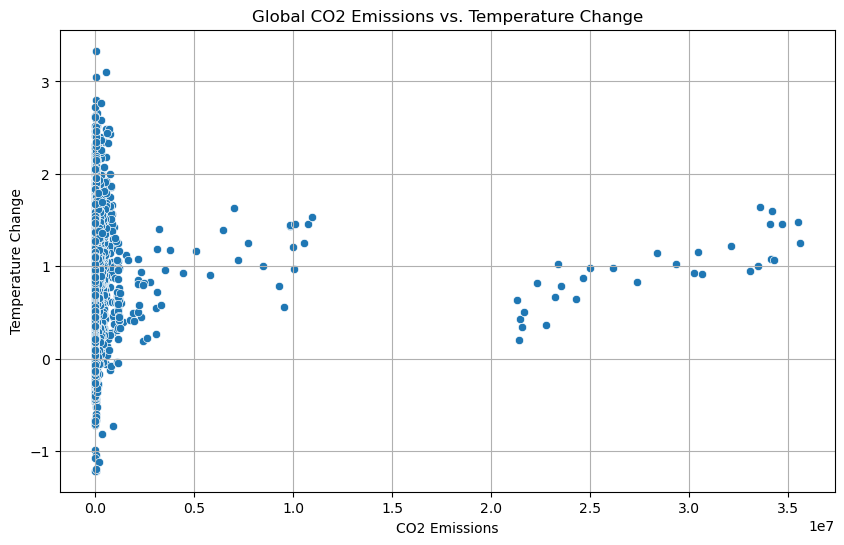

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
# Scatter plot for global data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='co2_emissions', y='Change')
plt.title('Global CO2 Emissions vs. Temperature Change')
plt.xlabel('CO2 Emissions')
plt.ylabel('Temperature Change')
plt.grid(True)
plt.show()

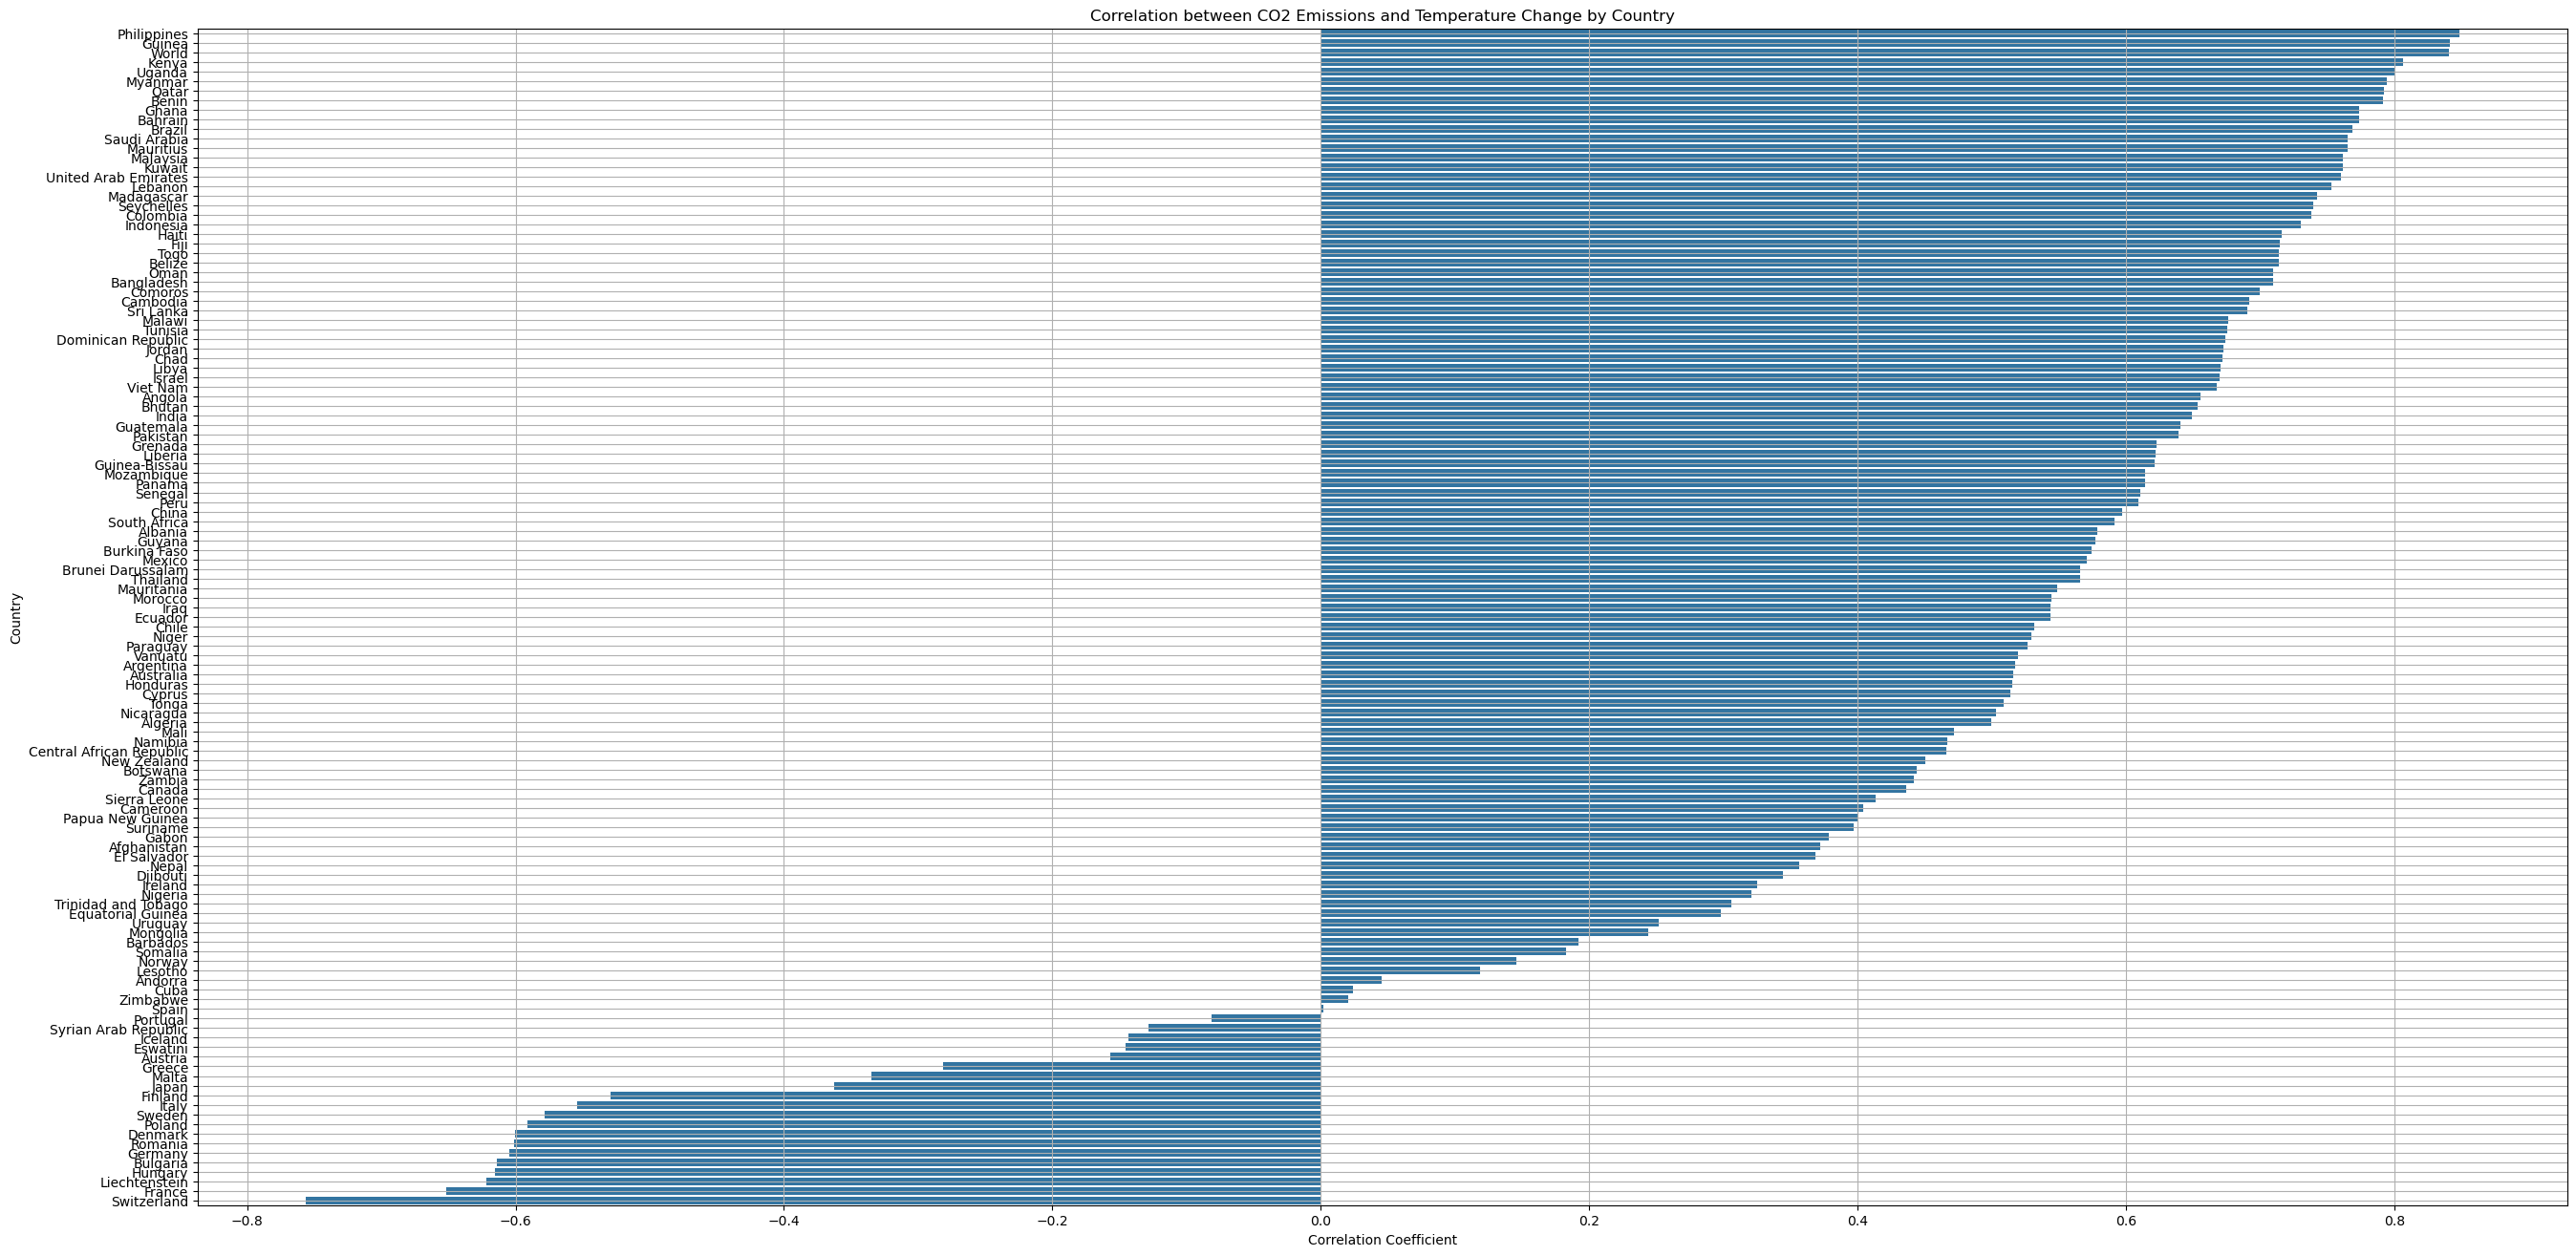

In [15]:
# Correlation coefficients for each country
plt.figure(figsize=(32, 16))
sns.barplot(data=correlation_results.sort_values(by='Correlation', ascending=False), x='Correlation', y='Area')
plt.title('Correlation between CO2 Emissions and Temperature Change by Country')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Country')
plt.grid(True)
plt.show()

In [16]:
# Display global correlation result
print(f'Global Correlation between CO2 Emissions and Temperature Change: {global_correlation:.2f}')

# Display correlation results for each country
print(correlation_results)

Global Correlation between CO2 Emissions and Temperature Change: 0.04
            Area  Correlation
0    Afghanistan     0.372221
1        Albania     0.578423
2        Algeria     0.499752
3        Andorra     0.045478
4         Angola     0.655496
..           ...          ...
118      Vanuatu     0.519771
119     Viet Nam     0.667480
120        World     0.840449
121       Zambia     0.441668
122     Zimbabwe     0.020220

[123 rows x 2 columns]


In [17]:
# Calculate the Pearson correlation coefficient for the global data
global_correlation = merged_df['co2_emissions'].corr(merged_df['Change'])
print(f'Global Correlation between CO2 Emissions and Temperature Change: {global_correlation:.2f}')

Global Correlation between CO2 Emissions and Temperature Change: 0.04


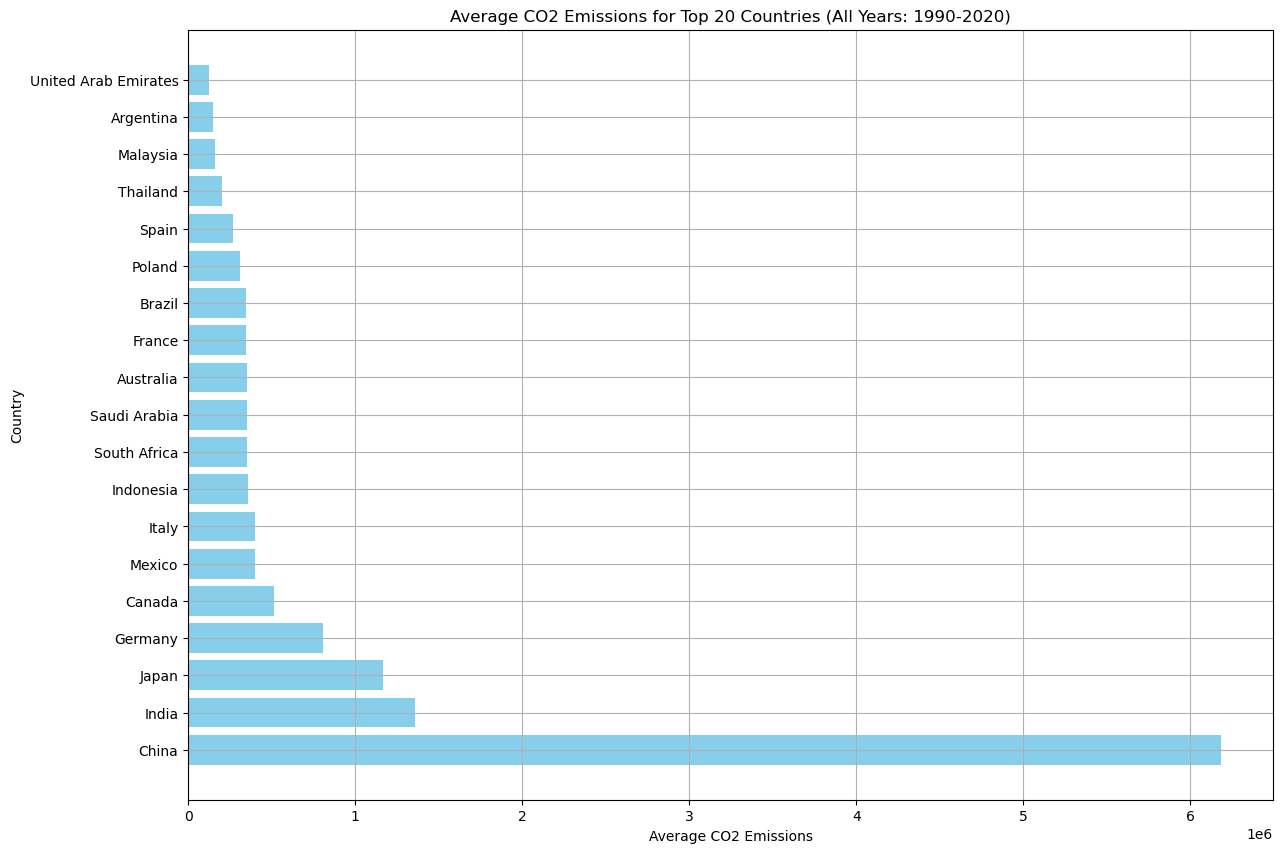

In [18]:
# Calculate average CO2 emissions for each country for all given years
average_co2_emissions_all_years = merged_df.groupby('Area')['co2_emissions'].mean().reset_index()

# Remove 'World' from the dataset
top_20_countries = average_co2_emissions_all_years.nlargest(20, 'co2_emissions')
top_20_countries = top_20_countries[top_20_countries['Area'] != 'World']

# Find the year span from the merged_df
year_span = (merged_df['Year'].min(), merged_df['Year'].max())

# Plot the average CO2 emissions for the top 20 countries excluding 'World' with the year span in the title
plt.figure(figsize=(14, 10))
plt.barh(top_20_countries['Area'], top_20_countries['co2_emissions'], color='skyblue')
plt.xlabel('Average CO2 Emissions')
plt.ylabel('Country')
plt.title(f'Average CO2 Emissions for Top 20 Countries (All Years: {year_span[0]}-{year_span[1]})')
plt.grid(True)
plt.show()


In [19]:
# Calculate average temperature change for the top 20 countries
average_temp_change = merged_df[merged_df['Area'].isin(top_20_countries['Area'])]
average_temp_change = average_temp_change.groupby('Area')['Change'].mean().reset_index()

# Merge the average CO2 emissions and average temperature change data for the top 20 countries
average_stats = pd.merge(top_20_countries, average_temp_change, on='Area')
average_stats.columns = ['Area', 'Average_CO2_Emissions', 'Average_Temperature_Change']

# Display the data
print(average_stats)


                    Area  Average_CO2_Emissions  Average_Temperature_Change
0                  China           6.185670e+06                    0.995253
1                  India           1.356317e+06                    0.525532
2                  Japan           1.164216e+06                    0.710441
3                Germany           8.055401e+05                    1.326930
4                 Canada           5.141739e+05                    1.131995
5                 Mexico           4.014578e+05                    0.708401
6                  Italy           3.991481e+05                    1.111422
7              Indonesia           3.573677e+05                    0.569419
8           South Africa           3.547334e+05                    0.775191
9           Saudi Arabia           3.528838e+05                    0.917651
10             Australia           3.508657e+05                    0.704272
11                France           3.487781e+05                    1.256040
12          

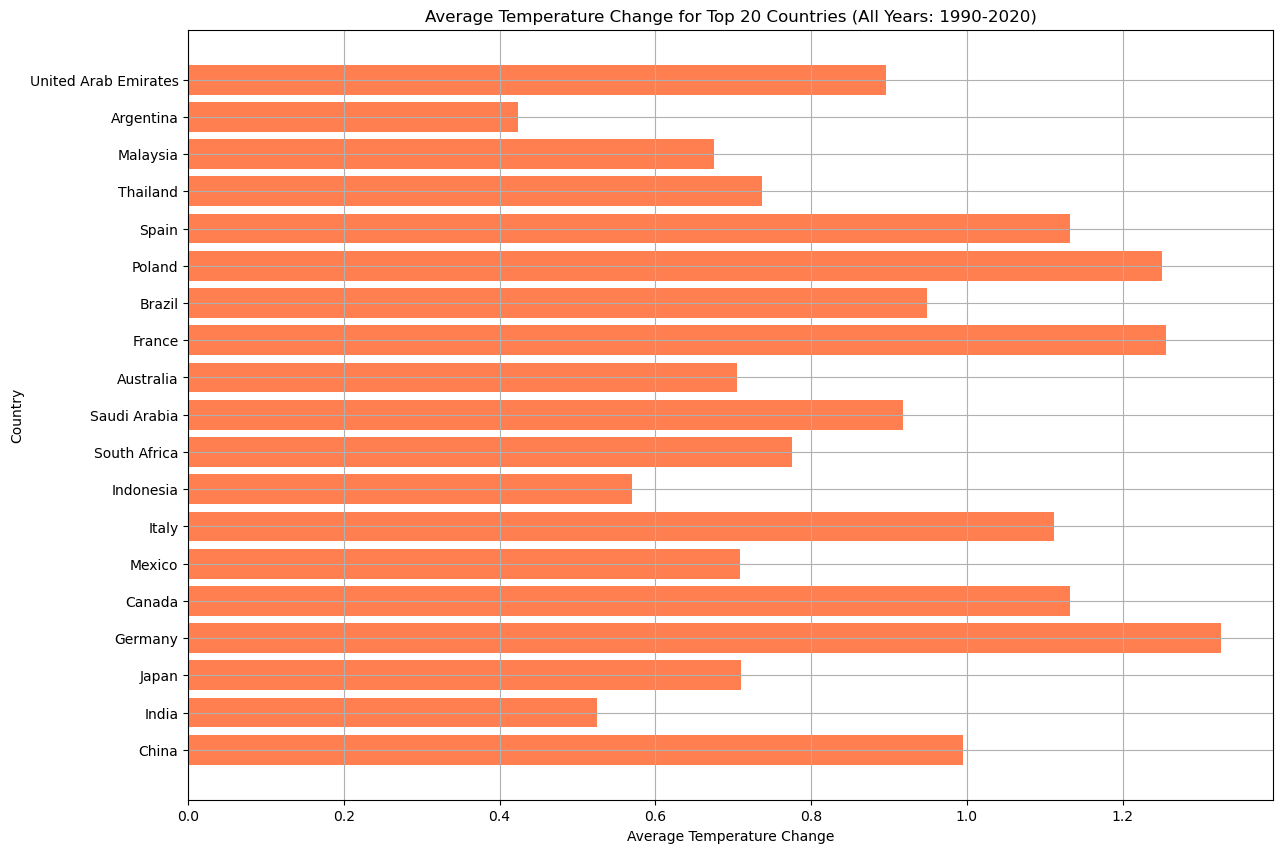

In [20]:
# Plot the average temperature change for the top 20 countries
plt.figure(figsize=(14, 10))
plt.barh(average_stats['Area'], average_stats['Average_Temperature_Change'], color='coral')
plt.xlabel('Average Temperature Change')
plt.ylabel('Country')
plt.title(f'Average Temperature Change for Top 20 Countries (All Years: {year_span[0]}-{year_span[1]})')
plt.grid(True)
plt.show()

/var/folders/sk/fn4_hptd42nbr6_wdcgx06hm0000gn/T/ipykernel_85408/2621059580.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = merged_df[merged_df['Area'].isin(top_20_countries['Area'])].groupby('Area').apply(


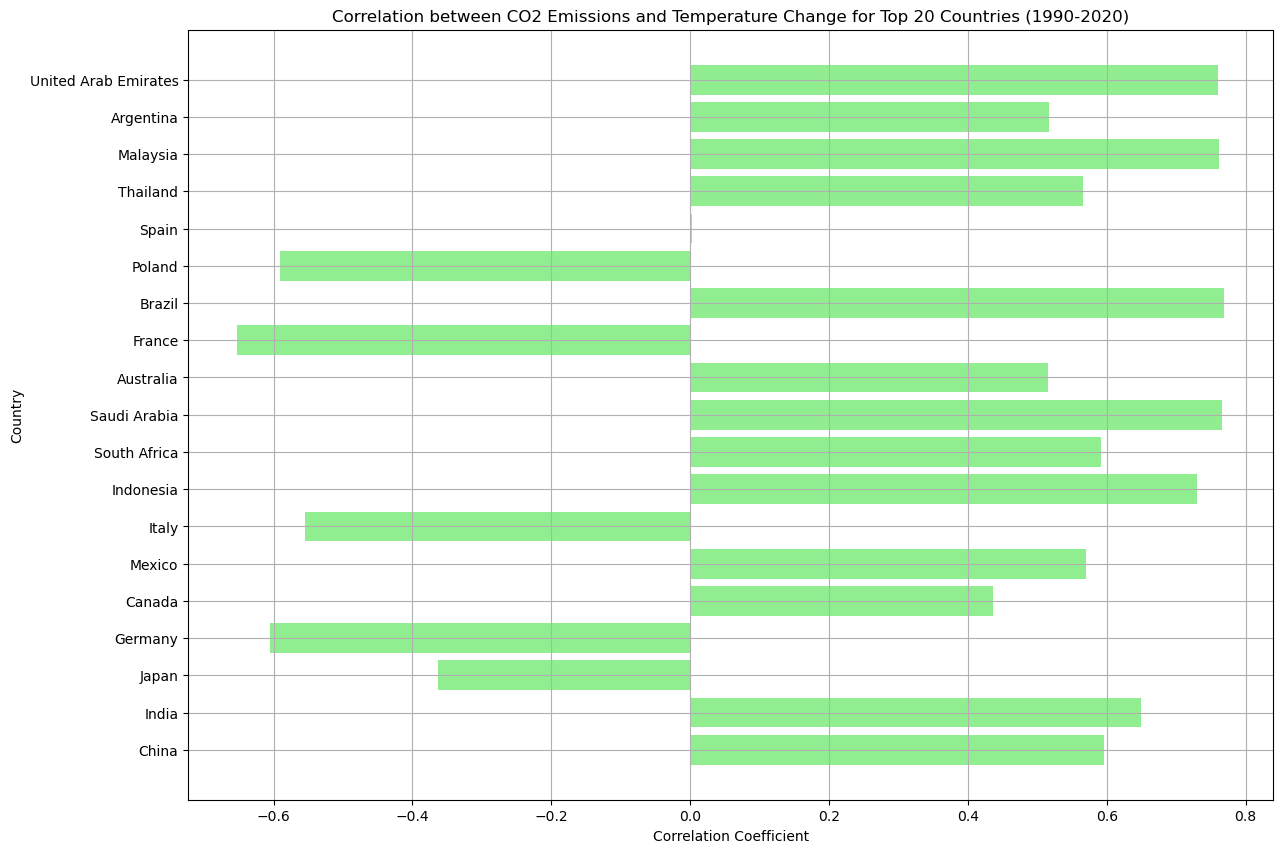

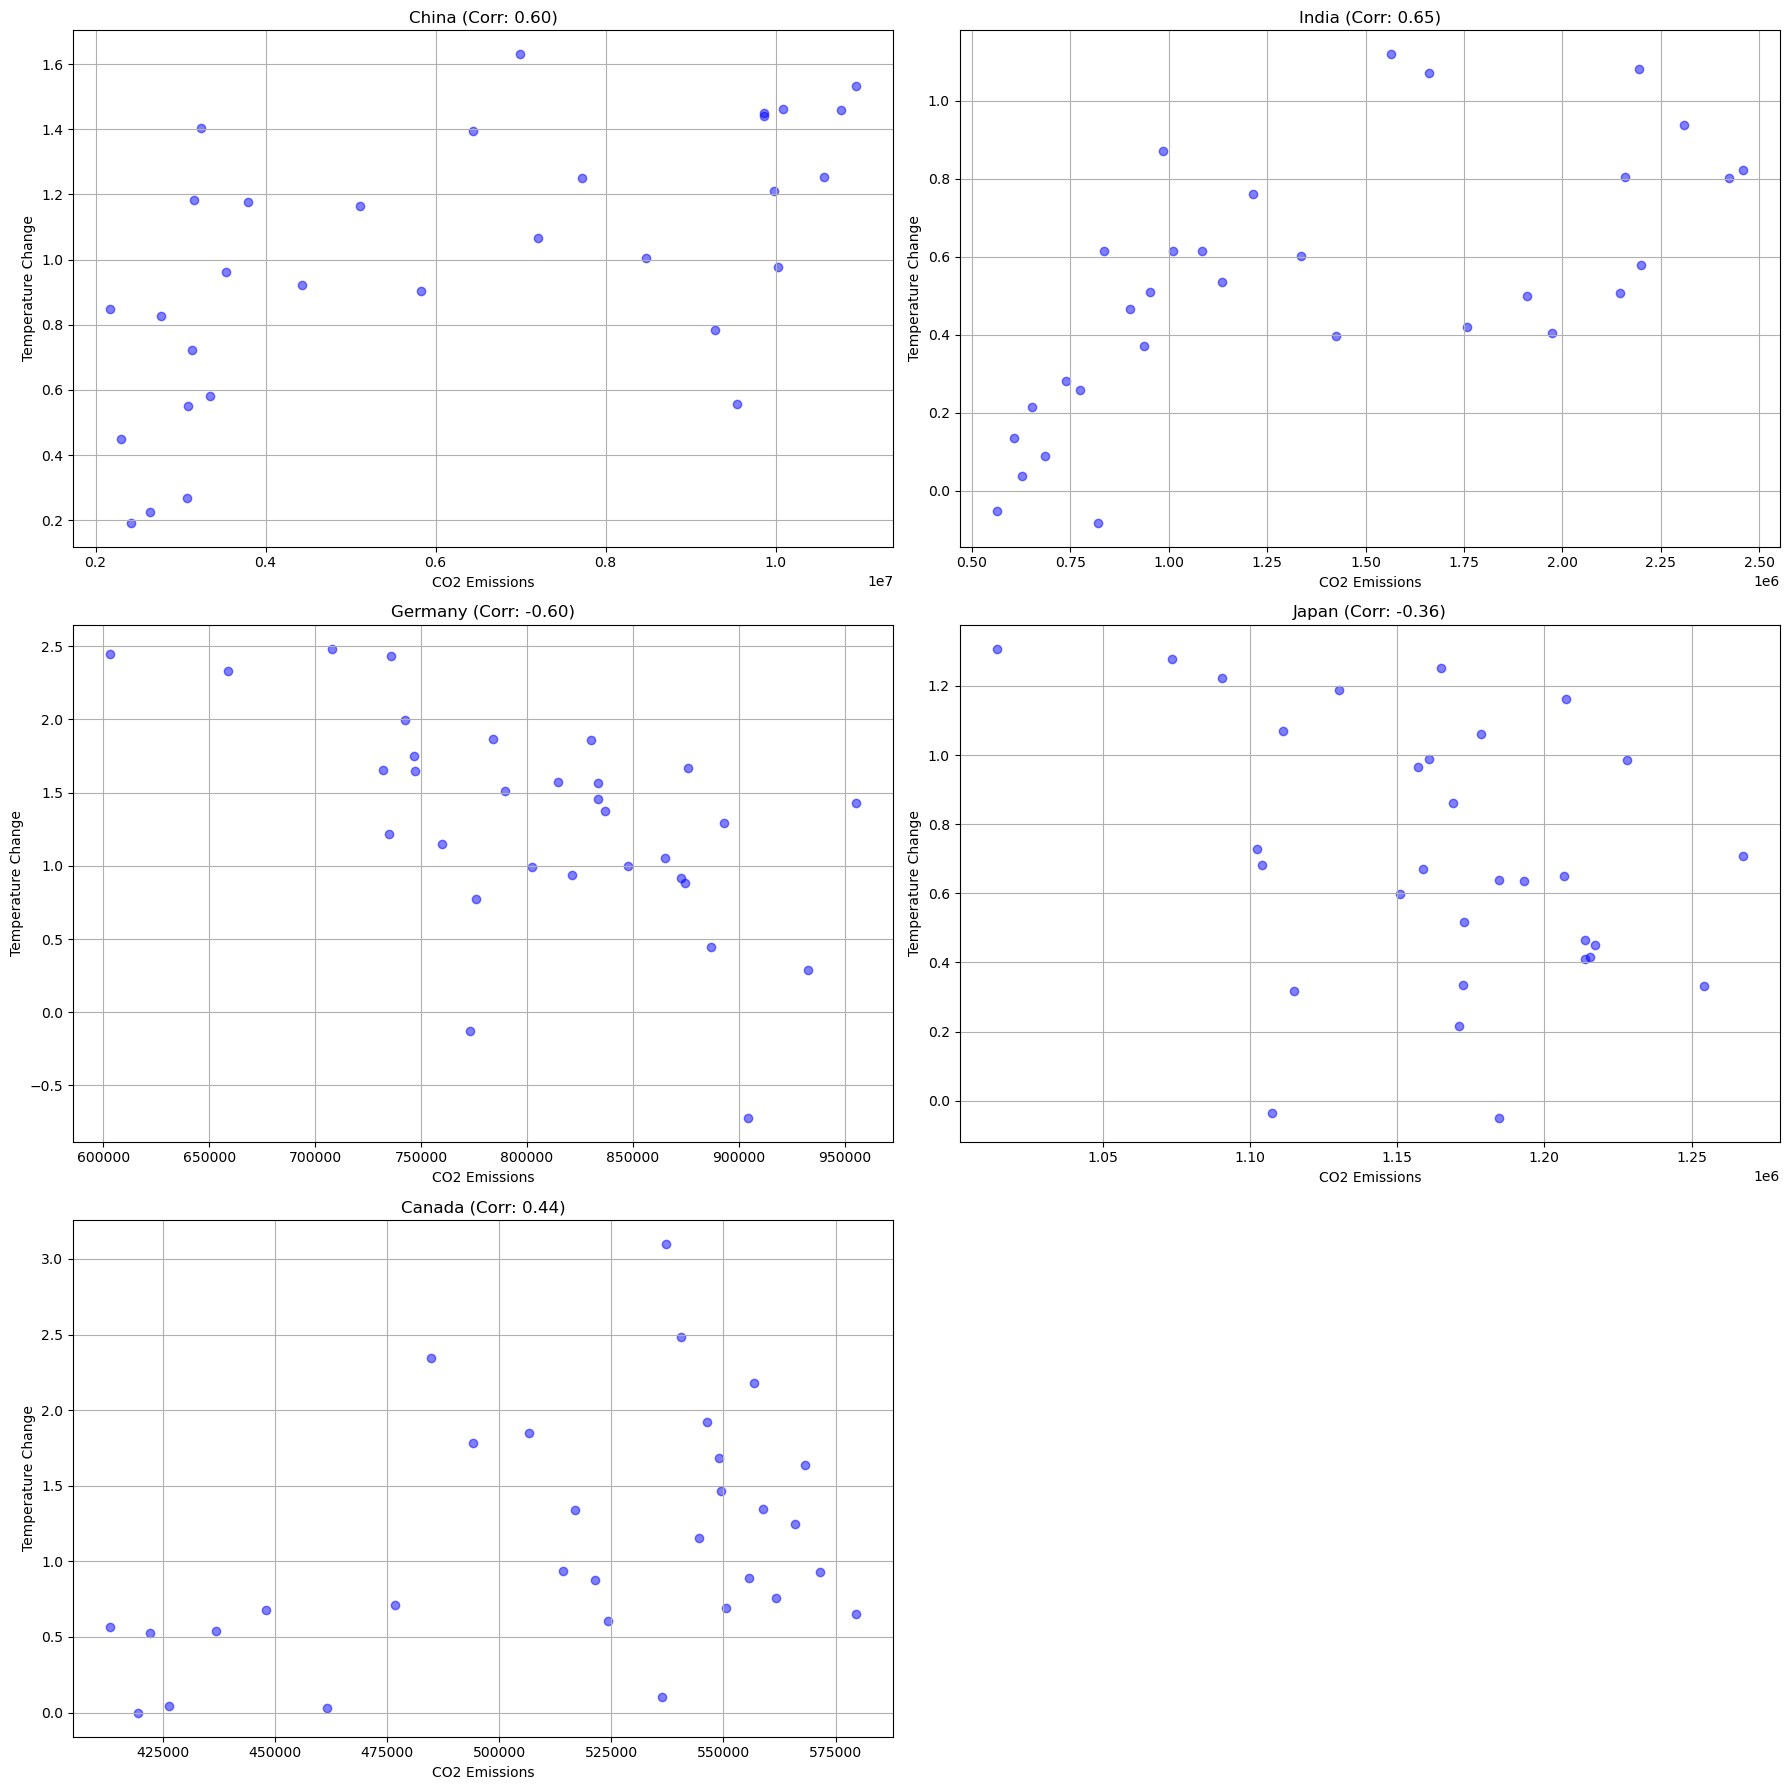

In [21]:
# Calculate the Pearson correlation coefficient for the top 20 countries
correlation_results = merged_df[merged_df['Area'].isin(top_20_countries['Area'])].groupby('Area').apply(
    lambda x: x['co2_emissions'].corr(x['Change'])
).reset_index()
correlation_results.columns = ['Area', 'Correlation']

# Merge the correlation results with the average stats
average_stats_with_corr = pd.merge(average_stats, correlation_results, on='Area')

# Plot correlation coefficients for the top 20 countries
plt.figure(figsize=(14, 10))
plt.barh(average_stats_with_corr['Area'], average_stats_with_corr['Correlation'], color='lightgreen')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Country')
plt.title('Correlation between CO2 Emissions and Temperature Change for Top 20 Countries (1990-2020)')
plt.grid(True)
plt.show()

# Scatter plots for a few countries to visualize the correlation
# Selecting a few countries with varying correlation coefficients
selected_countries = ['China', 'India', 'Germany', 'Japan', 'Canada']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
fig.delaxes(axes[2][1])  # Delete the unused subplot

for i, country in enumerate(selected_countries):
    country_data = merged_df[merged_df['Area'] == country]
    ax = axes[i//2, i%2]
    ax.scatter(country_data['co2_emissions'], country_data['Change'], color='blue', alpha=0.5)
    ax.set_title(f'{country} (Corr: {average_stats_with_corr[average_stats_with_corr["Area"] == country]["Correlation"].values[0]:.2f})')
    ax.set_xlabel('CO2 Emissions')
    ax.set_ylabel('Temperature Change')
    ax.grid(True)

plt.tight_layout()
plt.show()
